[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%204/4.9_style_trnasfer.ipynb)

## Import

In [ ]:
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from PIL import Image

## Contents 이미지

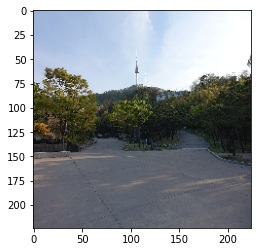

In [ ]:
# 남산타워 원경 사진
contents = cv2.imread('contents.jfif')
contents = cv2.resize(contents, (224, 224))
plt.imshow(cv2.cvtColor(contents,cv2.COLOR_BGR2RGB))

## Style 이미지

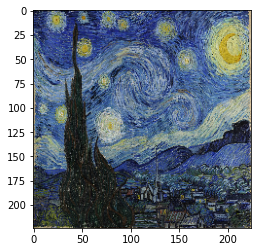

In [ ]:
# 고흐 작품
style = cv2.imread('style.jpg')
style = cv2.resize(style, (224, 224))
plt.imshow(cv2.cvtColor(style,cv2.COLOR_BGR2RGB))

## 사전학습 모델

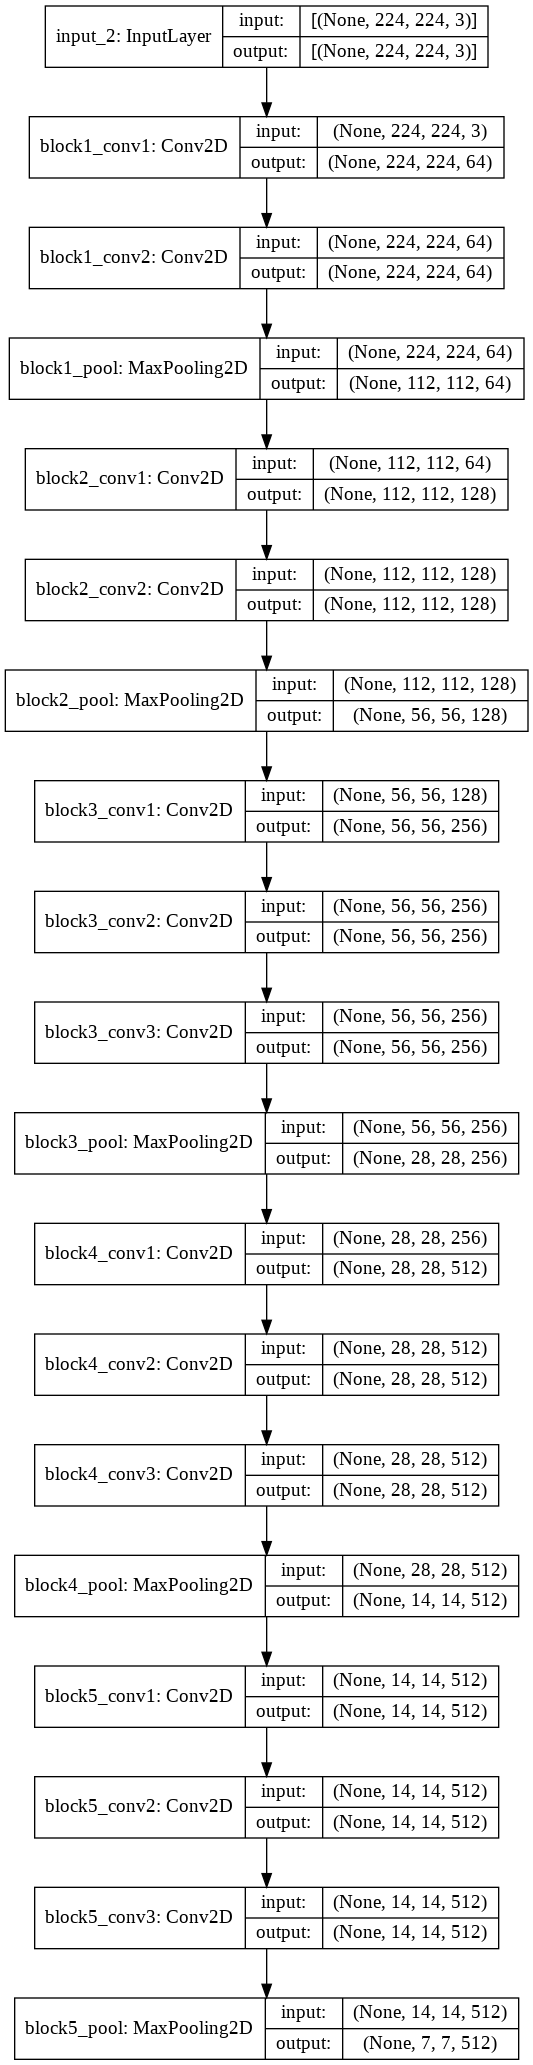

In [ ]:
vgg_model=tf.keras.applications.VGG16(input_shape=(224,224,3),
                                      include_top=False,weights='imagenet')
vgg_model.trainable=False
tf.keras.utils.plot_model(vgg_model,show_shapes=True)

## 스타일 변환 모델

In [ ]:
style_transfer_model=tf.keras.Model(inputs=[vgg_model.input],
                                    outputs=[
                                            vgg_model.get_layer(name='block1_conv2').output,
                                            vgg_model.get_layer(name='block2_conv2').output,
                                            vgg_model.get_layer(name='block3_conv3').output,
                                            vgg_model.get_layer(name='block4_conv3').output
])

style_transfer_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
style_true_b1c1, style_true_b2c2, style_true_b3c3, style_true_b4c3 = \
style_transfer_model.predict(np.reshape(style,(-1,224,224,3)))

style_true_b1c1.shape

(1, 224, 224, 64)

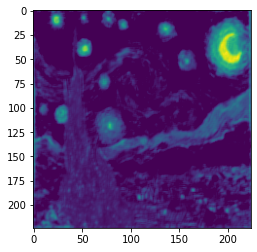

In [ ]:
plt.imshow(style_true_b1c1[0][:,:,60])

In [ ]:
contents_true_b1c1, contents_true_b2c2, contents_true_b3c3, contents_true_b4c3 = \
style_transfer_model.predict(np.reshape(contents,(-1,224,224,3)))

contents_true_b3c3.shape

(1, 56, 56, 256)

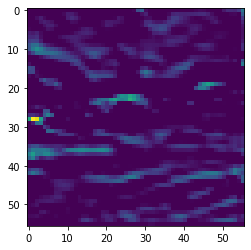

In [ ]:
plt.imshow(contents_true_b3c3[0][:,:,250])

In [ ]:
def gram_matrix(x):
    reshape_x=tf.transpose(x,[2,1,0])
    s = tf.shape(reshape_x)
    reshape_x=tf.reshape(reshape_x,(s[0],s[1]*s[2]))
    reshape_x_t=tf.transpose(reshape_x)
    dot=tf.matmul(reshape_x,reshape_x_t)
    dot=tf.cast(dot,dtype='float32')
    dot=dot/tf.cast(tf.shape(reshape_x)[0], tf.float32)/tf.cast(tf.shape(reshape_x)[1], tf.float32)
    return dot

gram_matrix(contents_true_b3c3[0])

<tf.Tensor: shape=(256, 256), dtype=float32, numpy=
array([[671.0898    , 300.31067   ,  29.798244  , ...,  79.880554  ,
         32.29058   ,  33.506176  ],
       [300.31067   , 677.15656   ,  38.14757   , ...,  76.13144   ,
         61.75631   ,  23.604467  ],
       [ 29.798244  ,  38.14757   ,  61.72365   , ...,  18.55625   ,
          0.72043455,   0.7689491 ],
       ...,
       [ 79.880554  ,  76.13144   ,  18.55625   , ..., 184.68985   ,
         18.262405  ,   1.3970368 ],
       [ 32.29058   ,  61.75631   ,   0.72043455, ...,  18.262405  ,
         94.53121   ,   5.902392  ],
       [ 33.506176  ,  23.604467  ,   0.7689491 , ...,   1.3970368 ,
          5.902392  ,  25.225632  ]], dtype=float32)>

In [ ]:
# 스타일 변환을 적용할 남산타워 이미지 
input_image = cv2.imread('contents.jfif')
input_image = cv2.resize(input_image, (224, 224))


1
s_loss tf.Tensor(1016712.4, shape=(), dtype=float32)
c_loss_3 tf.Tensor(0.0, shape=(), dtype=float32)

2
s_loss tf.Tensor(398316.78, shape=(), dtype=float32)
c_loss_3 tf.Tensor(79558.055, shape=(), dtype=float32)

3
s_loss tf.Tensor(279087.78, shape=(), dtype=float32)
c_loss_3 tf.Tensor(144592.89, shape=(), dtype=float32)

4
s_loss tf.Tensor(286933.4, shape=(), dtype=float32)
c_loss_3 tf.Tensor(109551.36, shape=(), dtype=float32)

5
s_loss tf.Tensor(211587.36, shape=(), dtype=float32)
c_loss_3 tf.Tensor(155401.5, shape=(), dtype=float32)

6
s_loss tf.Tensor(230286.39, shape=(), dtype=float32)
c_loss_3 tf.Tensor(122285.06, shape=(), dtype=float32)

7
s_loss tf.Tensor(184500.11, shape=(), dtype=float32)
c_loss_3 tf.Tensor(168889.28, shape=(), dtype=float32)

8
s_loss tf.Tensor(196234.12, shape=(), dtype=float32)
c_loss_3 tf.Tensor(126048.6, shape=(), dtype=float32)

9
s_loss tf.Tensor(143654.12, shape=(), dtype=float32)
c_loss_3 tf.Tensor(163724.75, shape=(), dtype=float32)

10
s_loss

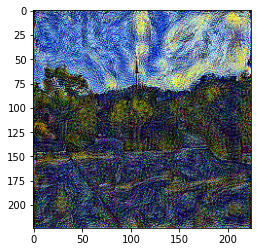

In [ ]:
img_avi=np.zeros((224,224,3))
opt=tf.keras.optimizers.Adam(10.0)

fcc=cv2.VideoWriter_fourcc(*'DIVX')
out=cv2.VideoWriter('style_transfer.avi',fcc,10.0,(224,224))

for epoch in range(200):
    input_image=tf.reshape(input_image,(-1,224,224,3))
    input_image=tf.cast(input_image,dtype='float32')
    input_image = tf.Variable(input_image, dtype=tf.float32)
    with tf.GradientTape() as tape:
        
        b1c1,b2c2,b3c3,b4c3=style_transfer_model(input_image)
        
        s_loss_1=tf.stop_gradient(gram_matrix(style_true_b1c1[0]))-gram_matrix(b1c1[0])
        s_loss_1=tf.reduce_mean(tf.square(s_loss_1))
        s_loss_2=tf.stop_gradient(gram_matrix(style_true_b2c2[0]))-gram_matrix(b2c2[0])
        s_loss_2=tf.reduce_mean(s_loss_2*s_loss_2)
        s_loss_3=tf.stop_gradient(gram_matrix(style_true_b3c3[0]))-gram_matrix(b3c3[0])
        s_loss_3=tf.reduce_mean(s_loss_3*s_loss_3)
        s_loss_4=tf.stop_gradient(gram_matrix(style_true_b4c3[0]))-gram_matrix(b4c3[0])
        s_loss_4=tf.reduce_mean(s_loss_4*s_loss_4)
              
        c_loss_1=contents_true_b1c1-b1c1
        c_loss_1=tf.reduce_mean(tf.square(c_loss_1))
        c_loss_2=contents_true_b2c2-b2c2
        c_loss_2=tf.reduce_mean(tf.square(c_loss_2))
        c_loss_3=contents_true_b3c3-b3c3
        c_loss_3=tf.reduce_mean(tf.square(c_loss_3))
        c_loss_4=contents_true_b4c3-b4c3
        c_loss_4=tf.reduce_mean(tf.square(c_loss_4))

        s_loss=(s_loss_1+s_loss_2+s_loss_3+s_loss_4)
        c_loss=(c_loss_1+c_loss_2+c_loss_3+c_loss_4)/4.
        loss=s_loss*10.0+c_loss_3
    grad=tape.gradient(loss,input_image)
    opt.apply_gradients([(grad,input_image)])
    input_image=tf.cast(input_image,dtype=tf.int32)
    input_image=tf.clip_by_value(input_image,0,255)
    img_avi=input_image.numpy()[0]
    if((epoch+0)%10==0):
        cv2.imwrite('{}.jpg'.format(epoch), img_avi)
    out.write(np.uint8(img_avi))
    print()
    print(epoch+1)
    print('s_loss',s_loss)
    print('c_loss_3',c_loss_3)
plt.imshow(input_image[0][:,:,::-1])
out.release()
cv2.destroyAllWindows()